#### Analysis of spectra with IronMatrix source, SDD detector, alpha iron absorber

In [21]:
import matplotlib.pyplot as plt
import matplotlib.dates as md
import matplotlib
%matplotlib inline 
%config InlineBackend.figure_format = 'retina'   # enable if you have a retina display

plt.style.use('Joey')

import numpy as np
import pandas as pd
import scipy.stats as sps
import datetime as datetime

import mossbauer
import utils as u

from scipy.integrate import simpson, quad, quad_vec
from scipy.special import jv
from scipy.interpolate import interp1d
from scipy.stats import norm
from matplotlib import gridspec
import os
from scipy import signal
from scipy.ndimage import gaussian_filter

from os.path import join

from tqdm import tqdm
from mossbauer.materials import CobaltRhodiumMatrix, AlphaIron, PotassiumFerrocyanide

import mcareader as mca

In [24]:
print(mossbauer.__file__)

/home/mossbauer/mossbauer_modeling/mossbauer/__init__.py


/home/mossbauer/.conda/envs/mossbauer/lib/python3.9/site-packages/mcareader.py:68: UserWarning: Warning: no calibration data was found. Using channel number instead of energy
  warnings.warn("Warning: no calibration data was found. Using channel number instead of energy")


226
0.305394658264907


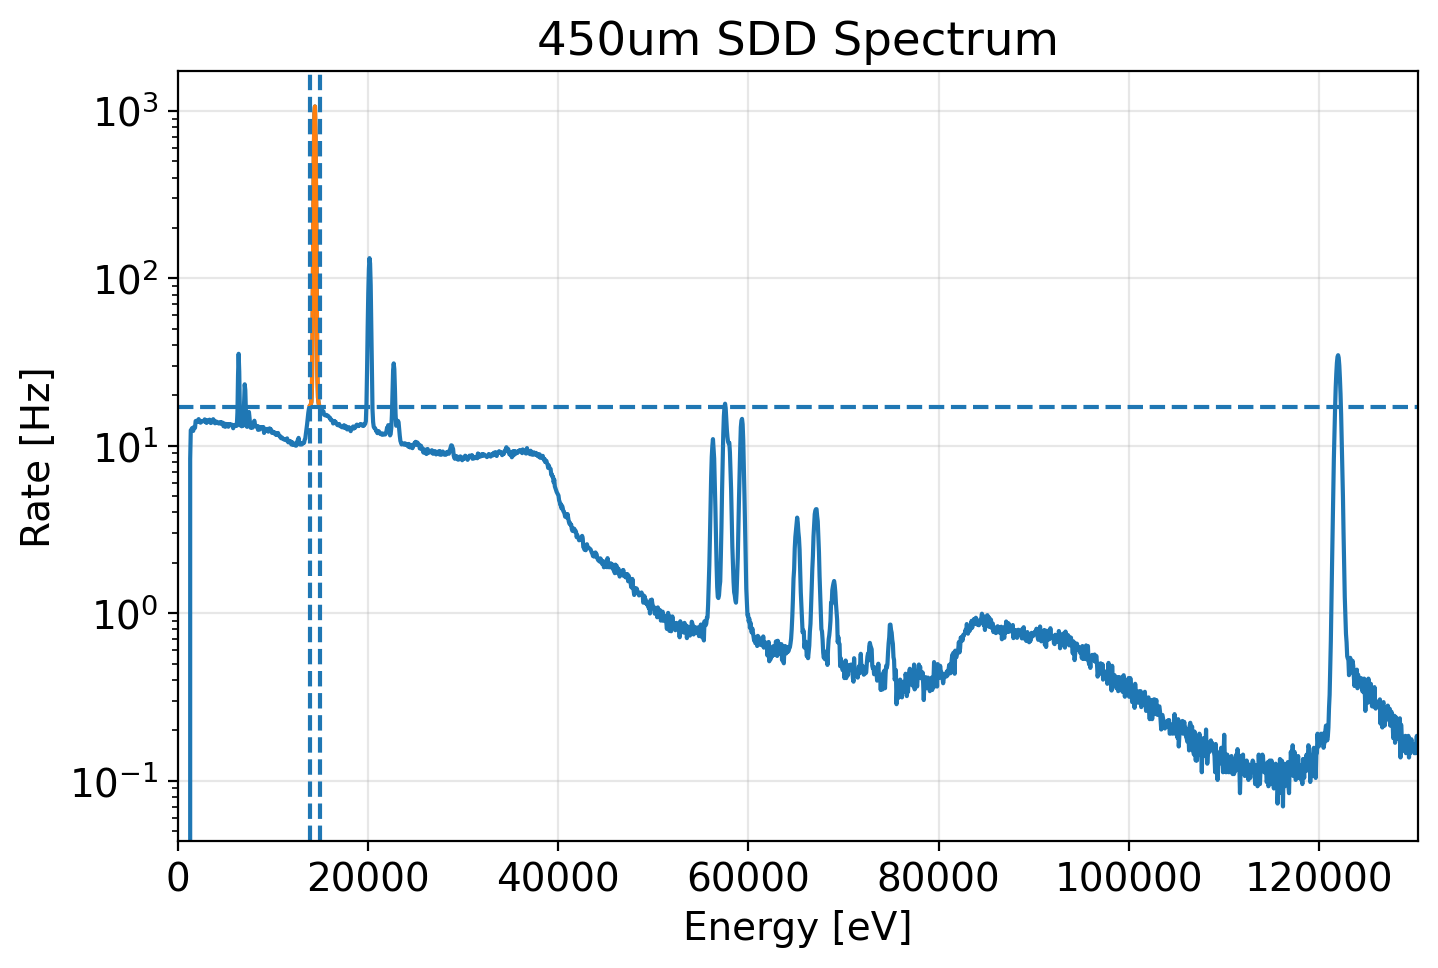

In [20]:
# Event Percentage
datadir = '/home/mossbauer/Data/mossbauer_data/'
fname = '20231231_scan/live_data_20240116.mca' 

s = mca.Mca(datadir+fname);
x,y = s.get_points(trim_zeros = False)
x=x[-len(y):]
t = float(s.get_variable("REAL_TIME"))

idx1 = 218
idx2 = 235

#idx14kev = np.argmax(data)
cal = 14.4e3/x[np.argmax(y)]
print(np.argmax(y))


#x = np.arange(len(data))
plt.plot(x*cal,y/t)#pd.read_csv(datadir+fname, encoding='unicode_escape')
plt.plot(x[idx1:idx2]*cal,y[idx1:idx2]/t)

plt.yscale('log')
#plt.xscale('log')

plt.ylabel('Rate [Hz]')
plt.xlabel('Energy [eV]')

plt.axhline( np.mean([y[idx1],y[idx2]])/t, linestyle='--')#, xmin = idx1*cal, xmax = idx2*cal, color= 'k')
plt.axvline(idx1*cal,linestyle='--')
plt.axvline(idx2*cal,linestyle='--')

plt.xlim(min(x*cal),max(x*cal))
print(y[idx1:idx2].sum()/y.sum())
plt.title("450um SDD Spectrum")
plt.savefig("SDD_Spectrum")
plt.show()

In [ ]:
lenp = 100
lx = np.zeros(lenp)
ly = np.zeros(lenp)





In [ ]:
# Signal - Noise Ratio 

/home/mossbauer/.conda/envs/mossbauer/lib/python3.9/site-packages/mcareader.py:68: UserWarning: Warning: no calibration data was found. Using channel number instead of energy
  warnings.warn("Warning: no calibration data was found. Using channel number instead of energy")


(1083.1858407079646, 0.07839086578309803, 12.756588283728478)

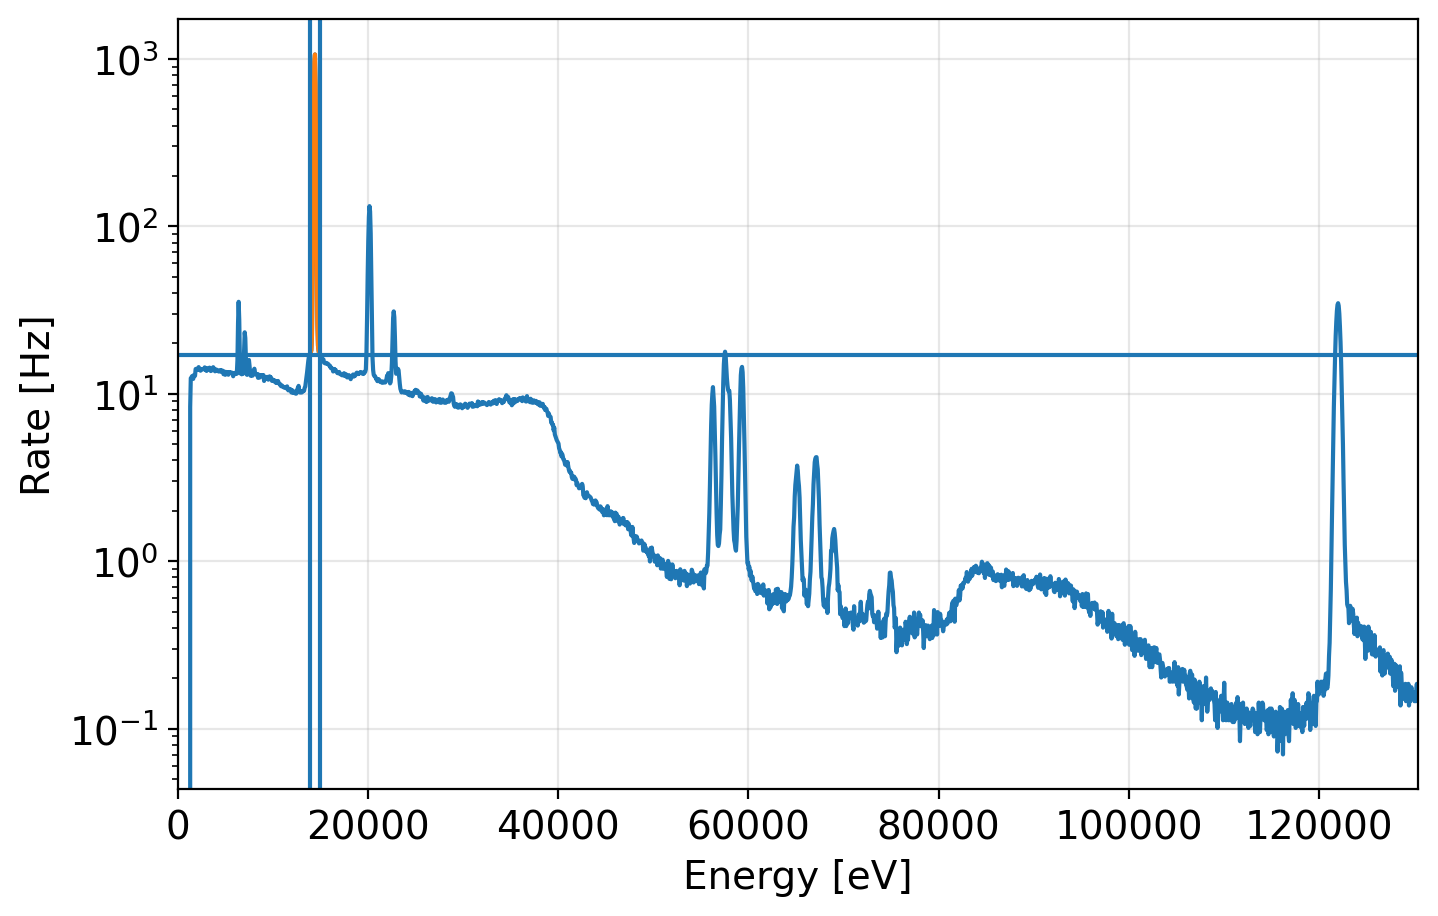

In [23]:
datadir = '/home/mossbauer/Data/mossbauer_data/'
fname = '20231231_scan/live_data_20240116.mca' 


s = mca.Mca(datadir+fname);
x,y = s.get_points(trim_zeros = False)
x=x[-len(y):]
t = float(s.get_variable("REAL_TIME"))

#idx1 = 201
#idx2 = 211

idx1 = 195
idx2 = 230

idx1 = 218
idx2 = 235

#idx1 = 150
#idx2 = 300

#idx1 = int(220*122/14)-20
#idx2 = int(220*122/14)+20


#idx1 = 0
#idx2 = -1

#idx14kev = np.argmax(data)
cal = 14.4e3/x[np.argmax(y)]


#x = np.arange(len(data))
plt.plot(x*cal,y/t)#pd.read_csv(datadir+fname, encoding='unicode_escape')
plt.plot(x[idx1:idx2]*cal,y[idx1:idx2]/t)

plt.yscale('log')
#plt.xscale('log')

plt.ylabel('Rate [Hz]')
plt.xlabel('Energy [eV]')

plt.xlim(min(x*cal),max(x*cal))

plt.axhline( np.mean([y[idx1],y[idx2]])/t)#, xmin = idx1*cal, xmax = idx2*cal, color= 'k')
plt.axvline(idx1*cal)
plt.axvline(idx2*cal)

off=0
N = np.mean([y[idx1-off],y[idx2+off]])*np.abs(idx2-idx1)

S = y[idx1:idx2].sum()-N
snr = S/N
snr
S/t, N/t

S/N, N/S, cal*50

(idx2-idx1)*cal, N/S, S/N

In [17]:
y[220:232].sum()/ y[100:int(220*122/14)+20].sum(), y[int(220*122/14)-20:int(220*122/14)+20].sum()/y.sum()

(0.3269500731559889, 0.027565854511383214)

In [4]:
rate_14kev = 1e7
fraction_14kev=S/y.sum()

#energy probability distribution
pE = y/y.sum()
E = cal*x
#average energy of detected photon:
Emean = (pe*e).sum() #eV

saturation_E = 1e6 #eV
dead_time = 20e-6

N_det = 166

rate_tot = rate_14kev/fraction_14kev
rate_per_det = rate_tot/N_det

saturation_time = saturation_E/(rate_per_det*Emean)
dead_time_fraction = dead_time/saturation_time 

fraction_14kev ,rate_tot/1e6, rate_per_det/1e6, saturation_time/1e-6,dead_time_fraction


NameError: name 'pe' is not defined

##### N/S

/home/mossbauer/.conda/envs/mossbauer/lib/python3.9/site-packages/mcareader.py:68: UserWarning: Warning: no calibration data was found. Using channel number instead of energy
  warnings.warn("Warning: no calibration data was found. Using channel number instead of energy")
/home/mossbauer/.conda/envs/mossbauer/lib/python3.9/site-packages/mcareader.py:68: UserWarning: Warning: no calibration data was found. Using channel number instead of energy
  warnings.warn("Warning: no calibration data was found. Using channel number instead of energy")
/home/mossbauer/.conda/envs/mossbauer/lib/python3.9/site-packages/mcareader.py:68: UserWarning: Warning: no calibration data was found. Using channel number instead of energy
  warnings.warn("Warning: no calibration data was found. Using channel number instead of energy")
/home/mossbauer/.conda/envs/mossbauer/lib/python3.9/site-packages/mcareader.py:68: UserWarning: Warning: no calibration data was found. Using channel number instead of energy
  warn

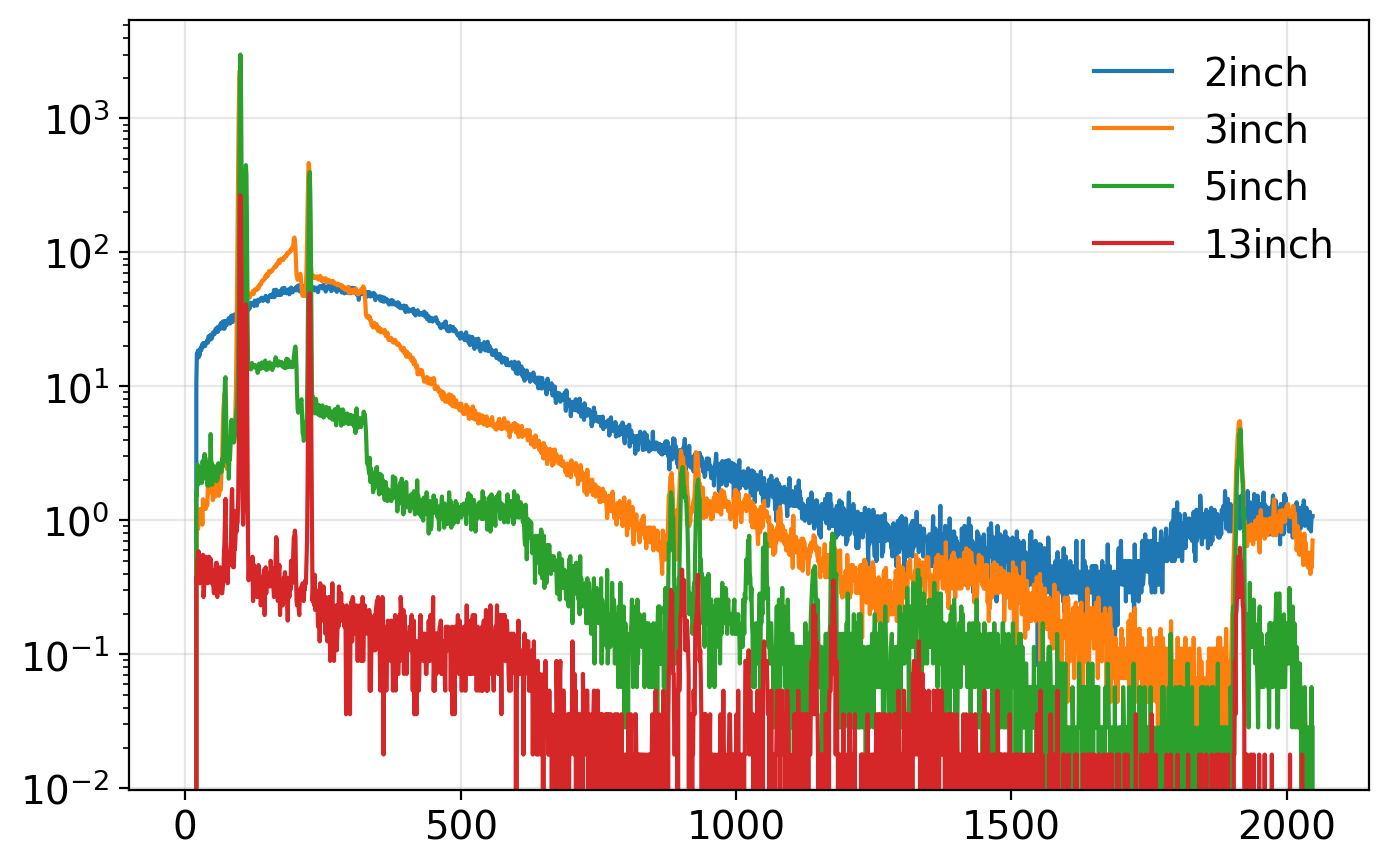

In [36]:
datadir = '/home/mossbauer/Data/mossbauer_data/20240118_spectra/'

files = ['live_data 2024118_2inch_noabsorber.mca',\
        'live_data 2024118_3inch_noabsorber.mca',\
        'live_data 2024118_5inch_noabsorber.mca',\
        'live_data 2024118_13inch_noabsorber.mca'\
        ]
for file in files:
    label = file[:-4].split("_")[-2]
    s = mca.Mca(datadir+file);
    x,y = s.get_points(trim_zeros = False)
    t = float(s.get_variable("REAL_TIME"))

    plt.plot(x,y/t, label =label )
    #plt.plot(x[215:250],y[215:250]/t)

plt.yscale("log")  
plt.legend(frameon = False)
#plt.show()

/home/mossbauer/.conda/envs/mossbauer/lib/python3.9/site-packages/mcareader.py:68: UserWarning: Warning: no calibration data was found. Using channel number instead of energy
  warnings.warn("Warning: no calibration data was found. Using channel number instead of energy")
/home/mossbauer/.conda/envs/mossbauer/lib/python3.9/site-packages/mcareader.py:68: UserWarning: Warning: no calibration data was found. Using channel number instead of energy
  warnings.warn("Warning: no calibration data was found. Using channel number instead of energy")
/home/mossbauer/.conda/envs/mossbauer/lib/python3.9/site-packages/mcareader.py:68: UserWarning: Warning: no calibration data was found. Using channel number instead of energy
  warnings.warn("Warning: no calibration data was found. Using channel number instead of energy")
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


0.2527269360372025
0.2978560310512067
0.37638749567584195


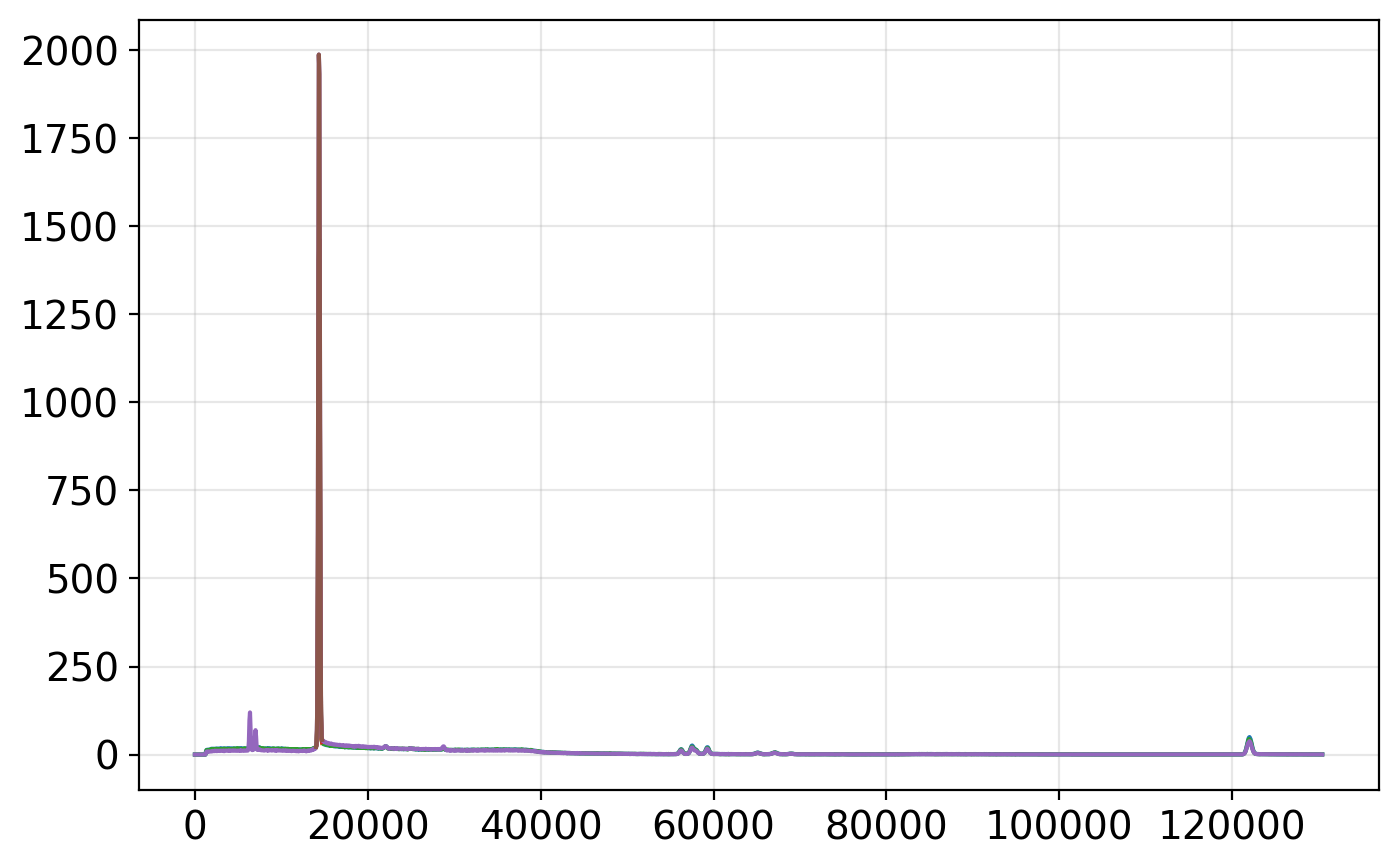

In [230]:
datadir = '/home/mossbauer/Data/mossbauer_data/20240118_spectra/'

files = [#'live_data 2024118_2inch_noabsorber.mca',\
        #'live_data 2024118_2inch_Al25um.mca',\
        #'live_data 2024118_2inch_Al75um.mca',\
        'live_data 2024118_2inch_Al200um.mca',\
         'live_data 2024118_2inch_Al400um.mca',\
         'live_data 2024118_2inch_Fe10umAl200um.mca',\
        ]
for file in files[::-1]:
    label = file[:-4].split("_")[-1]
    s = mca.Mca(datadir+file);
    x,y = s.get_points(trim_zeros = False)
    t = float(s.get_variable("REAL_TIME"))

    #plt.plot(x,y/t, label =label )
    plt.plot(x*cal,y/t)#pd.read_csv(datadir+fname, encoding='unicode_escape')
    plt.plot(x[idx1:idx2]*cal,y[idx1:idx2]/t)
    #plt.plot(x[215:250],y[215:250]/t)
    N = np.mean([y[idx1-off],y[idx2+off]])*np.abs(idx2-idx1)
    S = y[idx1:idx2].sum()-N
    T = y.sum()
    print(S/T)

#plt.ylim(1,3e2)
#plt.xlim(10000,20000)
#plt.yscale("log")  
plt.legend(frameon = False)
#plt.show()

/home/mossbauer/.conda/envs/mossbauer/lib/python3.9/site-packages/mcareader.py:68: UserWarning: Warning: no calibration data was found. Using channel number instead of energy
  warnings.warn("Warning: no calibration data was found. Using channel number instead of energy")
/home/mossbauer/.conda/envs/mossbauer/lib/python3.9/site-packages/mcareader.py:68: UserWarning: Warning: no calibration data was found. Using channel number instead of energy
  warnings.warn("Warning: no calibration data was found. Using channel number instead of energy")


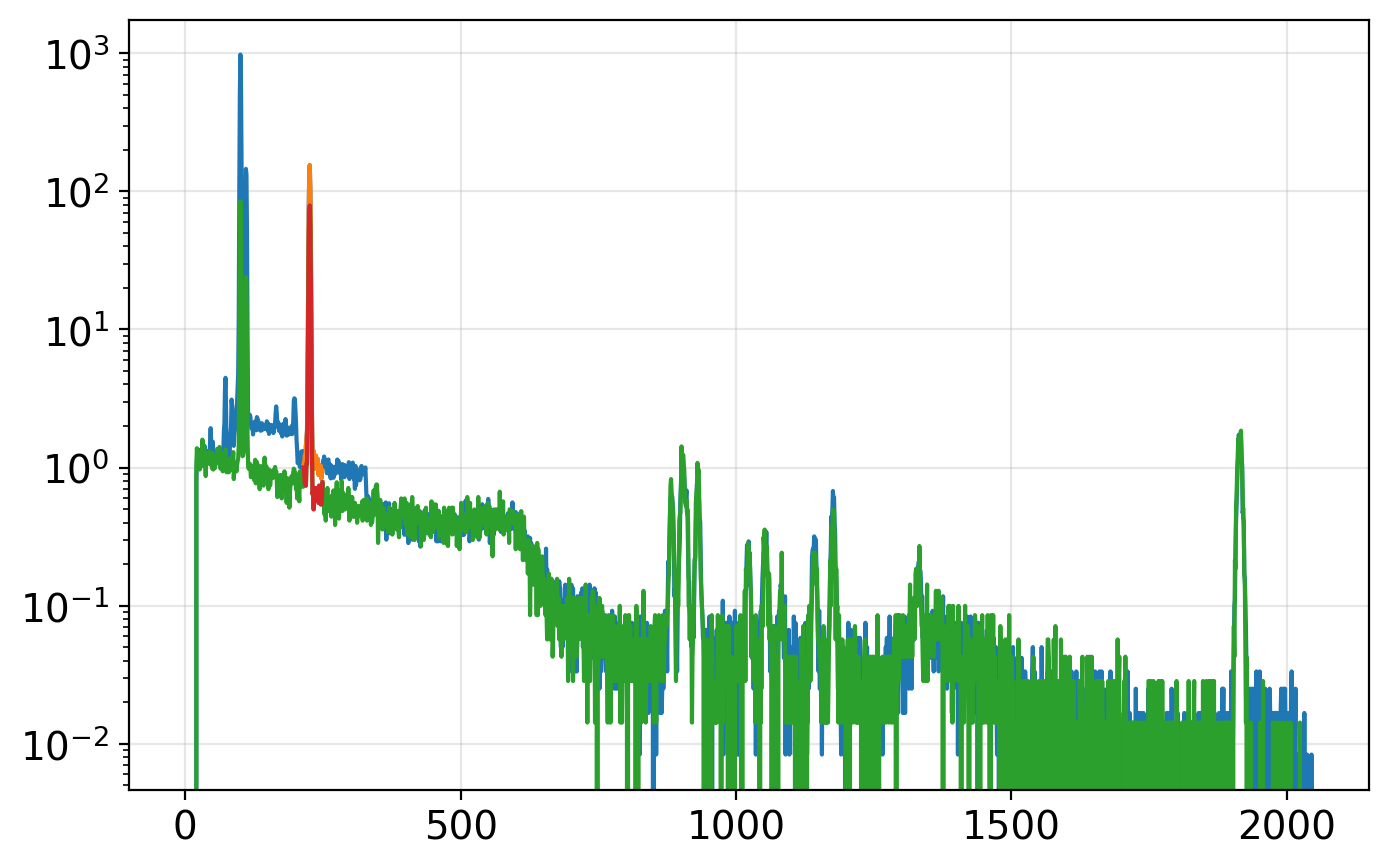

In [180]:
datadir = '/home/mossbauer/Data/mossbauer_data/'


fname = '20240117_spectra/live_data_20240116_1inch_Fe10um.mca'
s = mca.Mca(datadir+fname)
x,y = s.get_points(trim_zeros = False)
t = float(s.get_variable("REAL_TIME"))
#plt.plot(x,y/t)
#plt.plot(x[215:250],y[215:250]/t)


fname = '20240117_spectra/live_data_20240117_7inch_noabsorber.mca'
s = mca.Mca(datadir+fname)
x,y = s.get_points(trim_zeros = False)
t = float(s.get_variable("REAL_TIME"))
plt.plot(x,y/t)
plt.plot(x[215:250],y[215:250]/t)


fname = '20240117_spectra/live_data_20240117_7inch_Fe10um.mca'
s = mca.Mca(datadir+fname)
x,y = s.get_points(trim_zeros = False)
t = float(s.get_variable("REAL_TIME"))
plt.plot(x,y/t)
plt.plot(x[215:250],y[215:250]/t)




#plt.xlim(100,500)
plt.yscale("log")


In [57]:
y[215:250].sum()/t

296.70470390711705

In [231]:
g =9.8
c = 3e8
cs = 330
h= 0.5

g*h/(c*cs), 1.8e-6/40e3, 2.2e-6/40e3

(4.94949494949495e-11, 4.5e-11, 5.5000000000000004e-11)

In [241]:
G = 6.674e-11
R = 6.3781e6
M = 5.9722e24

g = G*M/R**2

M2 = 1e11
R2 =1e4
G*M2/R2**2/1e-9/1e5

0.0006674